# Eploration Velib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas_profiling
from sklearn import linear_model

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/traitlets/config/application.py", line 658, 

In [2]:
df_velib = pd.read_csv("data_Velib.csv", sep=",")

In [3]:
df_velib.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [4]:
df_velib.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [5]:
df_velib.loc[df_velib['holiday'] == 1].mean()

season          2.697749
holiday         1.000000
workingday      0.000000
weather         1.392283
temp           20.244244
atemp          23.397395
humidity       62.102894
windspeed      13.199711
casual         48.781350
registered    137.096463
count         185.877814
dtype: float64

In [6]:
pandas_profiling.ProfileReport(df_velib)

Number of variables,12
Number of observations,10886
Total Missing (%),0.0%
Total size in memory,1020.6 KiB
Average record size in memory,96.0 B
Numeric,7
Categorical,0
Boolean,2
Date,0
Text (Unique),1
Rejected,2


(array([4459., 2694., 1775.,  873.,  461.,  262.,  142.,  126.,   81.,
          13.]),
 array([  0. ,  88.6, 177.2, 265.8, 354.4, 443. , 531.6, 620.2, 708.8,
        797.4, 886. ]),
 <a list of 10 Patch objects>)

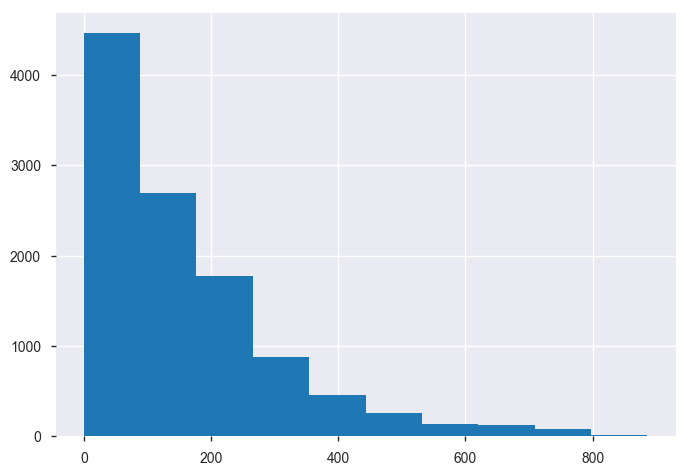

In [7]:
plt.hist(
    df_velib["registered"],
)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

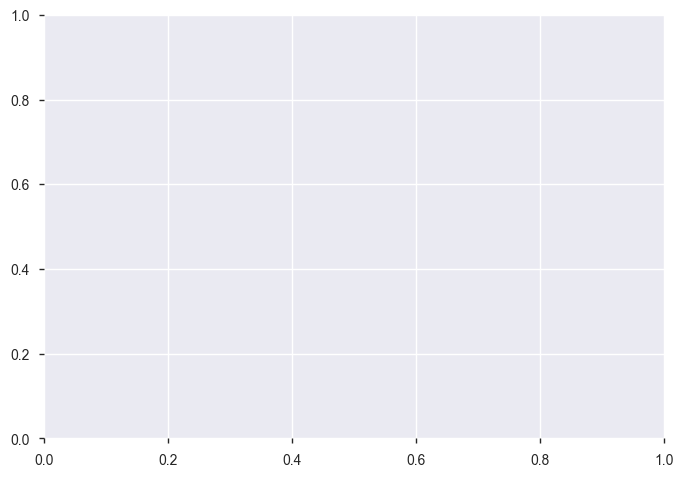

In [9]:
plt.boxplot(
    df_velib["weather"],
    df_velib["registered"].,
)